# Heart Disease Research Part II

In this project, you’ll investigate some data from a sample patients who were evaluated for heart disease at the Cleveland Clinic Foundation.

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway

### Inspect the Data 

In [58]:
heart = pd.read_csv('heart_disease.csv')
heart.head()

,age,sex,trestbps,chol,cp,exang,fbs,thalach,heart_disease
0,63.0,male,145.0,233.0,typical angina,0.0,1.0,150.0,absence
1,67.0,male,160.0,286.0,asymptomatic,1.0,0.0,108.0,presence
2,67.0,male,120.0,229.0,asymptomatic,1.0,0.0,129.0,presence
3,37.0,male,130.0,250.0,non-anginal pain,0.0,0.0,187.0,absence
4,41.0,female,130.0,204.0,atypical angina,0.0,0.0,172.0,absence


- age: age in years
- sex: sex assigned at birth; 'male' or 'female'
- trestbps: resting blood pressure in mm Hg
- chol: serum cholesterol in mg/dl
- cp: chest pain type ('typical angina', 'atypical angina', 'non-anginal pain', or 'asymptomatic')
- exang: whether the patient experiences exercise-induced angina (1: yes; 0: no)
- fbs: whether the patient’s fasting blood sugar is >120 mg/dl (1: yes; 0: no)
- thalach: maximum heart rate achieved in exercise test
- heart_disease: whether the patient is found to have heart disease ('presence': diagnosed with heart disease; 'absence': no heart disease)

### Predictors of Heart Disease 

#### heart_disease vs thalach

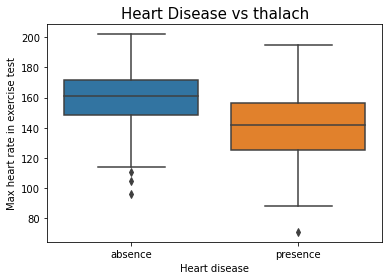

<Figure size 432x288 with 0 Axes>

In [59]:
sns.boxplot(x=heart['heart_disease'], y=heart['thalach'])
plt.xlabel('Heart disease')
plt.ylabel('Max heart rate in exercise test')
plt.title('Heart Disease vs thalach', fontsize=15)
plt.show()
plt.clf()

In [60]:
thalach_hd = heart.thalach[heart['heart_disease'] == 'presence']
thalach_hd.head(2)

1    108.0
2    129.0
Name: thalach, dtype: float64

In [61]:
thalach_no_hd = heart.thalach[heart['heart_disease'] == 'absence']
thalach_no_hd.head(2)

0    150.0
3    187.0
Name: thalach, dtype: float64

In [62]:
thalach_mean_diff = np.mean(thalach_no_hd) - np.mean(thalach_hd)
print('`thalach` mean different: ', thalach_mean_diff)

`thalach` mean different:  19.11905597473242


In [63]:
thalach_median_diff = np.median(thalach_no_hd) - np.median(thalach_hd)
print('`thalach` median different: ', thalach_median_diff)

`thalach` median different:  19.0


We’d like to find out if the average thalach of a heart disease patient is significantly different from the average thalach for a person without heart disease.

use to test the following null and alternative hypotheses:

- Null: The average thalach for a person with heart disease is equal to the average thalach for a person without heart disease.
- Alternative: The average thalach for a person with heart disease is NOT equal to the average thalach for a person without heart disease.

In [64]:
tstat, pval = ttest_ind(thalach_hd, thalach_no_hd)
print('p-value for `thalach` two-sample t-test: ', pval)

p-value for `thalach` two-sample t-test:  3.456964908430172e-14


(p-value (0.0000000000000345) less than significant threshold (0.05), we ‘reject the null hypothesis’  and conclude there is significant difference in thalach for people with heart disease compared to people with no heart disease.) 

#### heart_disease Vs Age 

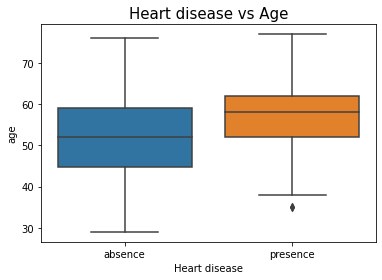

<Figure size 432x288 with 0 Axes>

In [65]:
sns.boxplot(x=heart['heart_disease'], y=heart['age'])
plt.xlabel('Heart disease')
plt.ylabel('age')
plt.title('Heart disease vs Age', fontsize=15)
plt.show()
plt.clf()

(Based on this plot, patient diagnosed with heart disease generally start for age around 50 years old.)

In [66]:
age_hd = heart.age[heart['heart_disease'] == 'presence']
age_no_hd = heart.age[heart['heart_disease'] == 'absence']

In [67]:
age_mean_diff = np.mean(age_hd) - np.mean(age_no_hd)
print('`age` mean different: ', age_mean_diff)

`age` mean different:  4.040533426917001


In [68]:
age_median_diff = np.median(age_hd) - np.median(age_no_hd)
print('`age` median different: ', age_median_diff)

`age` median different:  6.0


We’d like to find out if the average age of a heart disease patient is significantly different from the average age for a person without heart disease.

use to test the following null and alternative hypotheses:

- Null: The average age for a person with heart disease is equal to the average age for a person without heart disease.
- Alternative: The average age for a person with heart disease is NOT equal to the average age for a person without heart disease.

In [69]:
tstat, pval = ttest_ind(age_hd, age_no_hd)
print('p-value for `age` two-sample t-test : ', pval)

p-value for `age` two-sample t-test :  8.955636917529706e-05


(p-value (0.0000895) less than significant threshold (0.05), we ‘reject the null hypothesis’  and conclude there is significant difference in age for people with heart disease compared to people with no heart disease. )

#### heart_disease vs trestbps (resting blood pressure) 

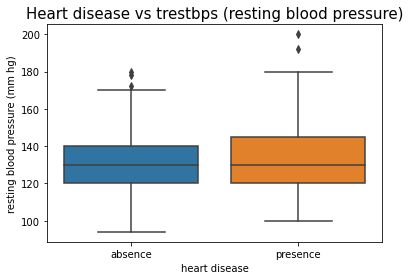

<Figure size 432x288 with 0 Axes>

In [70]:
sns.boxplot(x=heart['heart_disease'], y=heart['trestbps'])
plt.xlabel('heart disease')
plt.ylabel('resting blood pressure (mm hg)')
plt.title('Heart disease vs trestbps (resting blood pressure)', fontsize=15)
plt.show()
plt.clf()

(Based on this plot, patient diagnosed with heart disease and no heart disease generally have the same trestbps median 120-140 mm hg.)

In [71]:
trestbps_hd = heart.trestbps[heart['heart_disease'] == 'presence']
trestbps_no_hd = heart.trestbps[heart['heart_disease'] == 'absence']

In [72]:
trestbps_mean_diff = np.mean(trestbps_hd) - np.mean(trestbps_no_hd)
print('`trestbps` mean different : ', trestbps_mean_diff)

`trestbps` mean different :  5.318345323740999


In [73]:
trestbps_median_diff = np.median(trestbps_hd) - np.median(trestbps_no_hd)
print('`trestbps` median different : ', trestbps_median_diff)

`trestbps` median different :  0.0


We’d like to find out if the average thretbps of a heart disease patient is significantly different from the average trestbps for a person without heart disease.

use to test the following null and alternative hypotheses:

- Null: The average trestbps for a person with heart disease is equal to the average trestbps for a person without heart disease.
- Alternative: The average trestbps for a person with heart disease is NOT equal to the average trestbps for a person without heart disease.

In [74]:
tsats, pval = ttest_ind(trestbps_hd, trestbps_no_hd)
print('p-value for `trestbps` two-sample t-test : ', pval)

p-value for `trestbps` two-sample t-test :  0.008548268928594928


(p-value (0.008) less than significant threshold (0.05), we ‘reject the null hypothesis’  and conclude there is significant difference in trestbps (resting blood pressure) for people with heart disease compared to people with no heart disease.)

#### heart_disease vs chol (cholesterol) 

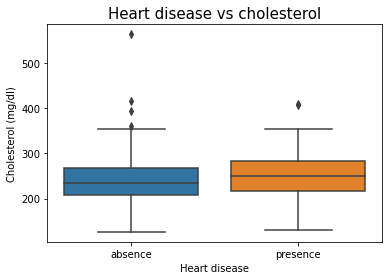

<Figure size 432x288 with 0 Axes>

In [75]:
sns.boxplot(x=heart['heart_disease'], y=heart['chol'])
plt.xlabel('Heart disease')
plt.ylabel('Cholesterol (mg/dl)')
plt.title('Heart disease vs cholesterol', fontsize=15)
plt.show()
plt.clf()

(Based on this plot, patient diagnosed with heart disease and no heart disease generally have difference chol median (200-300 mm/dl).)

In [76]:
chol_hd = heart.chol[heart['heart_disease'] == 'presence']
chol_no_hd = heart.chol[heart['heart_disease'] == 'absence']

In [77]:
chol_mean_diff = np.mean(chol_hd) - np.mean(chol_no_hd)
print('`chol` mean different : ', chol_mean_diff)

`chol` mean different :  8.834576241445887


In [78]:
chol_median_diff = np.median(chol_hd) - np.median(chol_no_hd)
print('`chol` median different : ', chol_median_diff)

`chol` median different :  14.5


We’d like to find out if the average chol of a heart disease patient is significantly different from the average chol for a person without heart disease.

use to test the following null and alternative hypotheses:

- Null: The average chol for a person with heart disease is equal to the average chol for a person without heart disease.
- Alternative: The average chol for a person with heart disease is NOT equal to the average chol for a person without heart disease.

In [79]:
tstat, pval = ttest_ind(chol_hd, chol_no_hd)
print('p-value for `chol` two-sample t-test : ', pval)

p-value for `chol` two-sample t-test :  0.13914167020436527


(p-value (0.13) higher than significant threshold (0.05), we ‘accept the null hypothesis’  and conclude there is not significant difference in chol (cholesterol) for people with heart disease compared to people with no heart disease. )

### Chest Pain and Max Heart Rate 

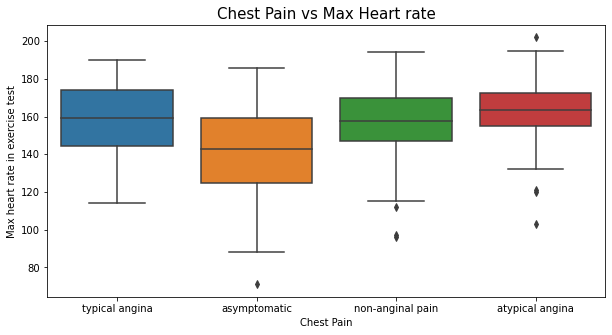

<Figure size 432x288 with 0 Axes>

In [80]:
plt.figure(figsize=(10, 5))

sns.boxplot(x=heart['cp'], y=heart['thalach'])
plt.xlabel('Chest Pain')
plt.ylabel('Max heart rate in exercise test')
plt.title('Chest Pain vs Max Heart rate', fontsize=15)
plt.show()
plt.clf()

In [81]:
thalach_typical = heart.thalach[heart['cp'] == 'typical angina']
thalach_asymptom = heart.thalach[heart['cp'] == 'asymptomatic']
thalach_nonangin = heart.thalach[heart['cp'] == 'non-anginal pain']
thalach_atypical = heart.thalach[heart['cp'] == 'atypical angina']

Run a single hypothesis test to address the following null and alternative hypotheses:

- Null: People with typical angina, non-anginal pain, atypical angina, and asymptomatic people all have the same average thalach.
- Alternative: People with typical angina, non-anginal pain, atypical angina, and asymptomatic people do not all have the same average thalach.

In [82]:
fstat, pval = f_oneway(thalach_typical, thalach_asymptom, thalach_nonangin, thalach_atypical)
print('p-value for ANOVA : ', pval)

p-value for ANOVA :  1.9065505247705008e-10


(p-value (0.00000000019) less than significant threshold (0.05), we ‘reject the null hypothesis’  and conclude there is significant difference in people with typical angina, non-anginal pain, atypical angina, and asymptomatic people don't have the same average thalach. )

If you completed the previous step correctly, you should have concluded that there is at least one pair of chest pain types (cp) for which people with those pain types have significantly different average max heart rates during exercise (thalach).

Run another hypothesis test to determine which of those pairs are significantly different. Use an overall type I error rate of 0.05 for all six comparisons.

In [85]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_result = pairwise_tukeyhsd(heart['thalach'], heart['cp'], .05)
tukey_result.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
asymptomatic,atypical angina,21.7394,0.001,12.7439,30.735,True
asymptomatic,non-anginal pain,14.7264,0.001,7.258,22.1948,True
asymptomatic,typical angina,15.276,0.0081,2.9702,27.5817,True
atypical angina,non-anginal pain,-7.013,0.2481,-16.7591,2.733,False
atypical angina,typical angina,-6.4635,0.6069,-20.2707,7.3438,False
non-anginal pain,typical angina,0.5495,0.9,-12.315,13.4141,False


-	for any pairwaise ‘reject the null’ is ‘True’, we conclude that people with those chest pain types have significantly different maximum heart rates during exercise.  
-	Maybe surprisingly, people who are ‘asymptomatic’ seem to have lower maximum heart rate (associated with heart disease) than people who have other kinds of chest pain.

### Heart Disease and Chest Pain 

In [86]:
xtab = pd.crosstab(heart['heart_disease'], heart['cp'])
xtab

cp,asymptomatic,atypical angina,non-anginal pain,typical angina
heart_disease,,,,
absence,39,41,68,16
presence,105,9,18,7


Run a hypothesis test for the following null and alternative hypotheses:

- Null: There is NOT an association between chest pain type and whether or not someone is diagnosed with heart disease.
- Alternative: There is an association between chest pain type and whether or not someone is diagnosed with heart disease.

In [89]:
from scipy.stats import chi2_contingency

chi2, pval, dof, expected = chi2_contingency(xtab)
print('chi2-value : ', chi2)

chi2-value :  81.81577027653815


In [90]:
print('p-value : ', pval)

p-value :  1.2517106007837527e-17


(p-value (0.0000000000000000125) less than 0.05, we ‘reject the null’, we can conclude that there is a significant association between these variable.)

### Further Exploration 

In [92]:
xtab_sex_hd = pd.crosstab(heart['sex'], heart['heart_disease'])
xtab_sex_hd

heart_disease,absence,presence
sex,,
female,72,25
male,92,114


In [93]:
chi2, pval, dof, expected = chi2_contingency(xtab_sex_hd)
print('chi2-value : ', chi2)

chi2-value :  22.042560606155472


In [94]:
print('p-value : ', pval)

p-value :  2.666712348180942e-06


(p-value (0.00000266) less than 0.05, we ‘reject the null’, we can conclude that there is a significant between gender for people with heart disease compared to people with no heart disease.)